In [1330]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = "~/Desktop/portfolio/Portfolio/07_Marriage_Over_Time/ms1.xls"


df = pd.read_excel(data, header = 9)

df.drop([0,1], axis = 0, inplace=True)
df.drop([df.columns[3],df.columns[8], df.columns[11], 
         df.columns[1], df.columns[2], df.columns[9], 
         df.columns[10]], axis = 1, inplace=True)


df.rename(columns = {"Year":'year', "Total.1":"m_total", "married":"m_married",
           "Widowed":"m_widowed", "Divorced":"m_divorced", 
           "Total.3":"f_total", "married.1":"f_married",
           "Widowed.1":"f_widowed", "Divorced.1":"f_divorced"}, 
          inplace=True)
df.reset_index(inplace=True)
df.drop(columns = 'index', inplace=True)
df.head()

,year,m_total,m_married,m_widowed,m_divorced,f_total,f_married,f_widowed,f_divorced
0,..2021,61757.0,47351.0,3582.0,10824.0,68505.0,41808.0,11612.0,15085.0
1,..2020,60104.0,45958.0,3479.0,10667.0,66821.0,40873.0,11267.0,14681.0
2,..2019,59399.0,45279.0,3465.0,10655.0,66300.0,40084.0,11412.0,14804.0
3,..2018,59257.0,44792.0,3405.0,11060.0,66294.0,39770.0,11691.0,14833.0
4,..2017,57993.0,43825.0,3277.0,10891.0,65320.0,39087.0,11642.0,14591.0


In [1331]:
df['tot_pop'] = df['m_total'] + df["f_total"]

In [1332]:
df['tot_married'] = df['m_married'] + df['f_married']

In [1333]:
df['tot_widowed'] = df['m_widowed'] + df['f_widowed']

In [1334]:
df['tot_divorced'] = df['m_divorced'] + df['f_divorced']

In [1335]:
df.count()

year            238
m_total         221
m_married       221
m_widowed       221
m_divorced      221
f_total         221
f_married       221
f_widowed       221
f_divorced      221
tot_pop         221
tot_married     221
tot_widowed     221
tot_divorced    221
dtype: int64

In [1336]:
df.isna().sum()

year            16
m_total         33
m_married       33
m_widowed       33
m_divorced      33
f_total         33
f_married       33
f_widowed       33
f_divorced      33
tot_pop         33
tot_married     33
tot_widowed     33
tot_divorced    33
dtype: int64

In [1337]:
df.isnull().sum()

year            16
m_total         33
m_married       33
m_widowed       33
m_divorced      33
f_total         33
f_married       33
f_widowed       33
f_divorced      33
tot_pop         33
tot_married     33
tot_widowed     33
tot_divorced    33
dtype: int64

In [1338]:
df.iloc[[146]]

,year,m_total,m_married,m_widowed,m_divorced,f_total,f_married,f_widowed,f_divorced,tot_pop,tot_married,tot_widowed,tot_divorced
146,.Asian2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1339]:
df['pct_married'] = round(100*df['tot_married']/df['tot_pop'],2)

df['pct_widowed'] = round(100*df['tot_widowed']/df['tot_pop'],2)

df['pct_divorced'] = round(100*df['tot_widowed']/df['tot_pop'],2)

In [1340]:
df['race'] = "all_races"

In [1341]:
races = ['Asian', 'Black', 'Hispanic', 'White']

for curr_row in range(len(df)):
    for el in races:
        
        if el in str(df.iloc[curr_row,0]):
            for curr_col in range(len(df.columns)):
                df.iloc[curr_row,curr_col] = el


    
        

In [1342]:
df[df['year'] == 'White']

,year,m_total,m_married,m_widowed,m_divorced,f_total,f_married,f_widowed,f_divorced,tot_pop,tot_married,tot_widowed,tot_divorced,pct_married,pct_widowed,pct_divorced,race
36,White,White,White,White,White,White,White,White,White,White,White,White,White,White,White,White,White


In [1343]:
df

,year,m_total,m_married,m_widowed,m_divorced,f_total,f_married,f_widowed,f_divorced,tot_pop,tot_married,tot_widowed,tot_divorced,pct_married,pct_widowed,pct_divorced,race
0,..2021,61757.0,47351.0,3582.0,10824.0,68505.0,41808.0,11612.0,15085.0,130262.0,89159.0,15194.0,25909.0,68.45,11.66,11.66,all_races
1,..2020,60104.0,45958.0,3479.0,10667.0,66821.0,40873.0,11267.0,14681.0,126925.0,86831.0,14746.0,25348.0,68.41,11.62,11.62,all_races
2,..2019,59399.0,45279.0,3465.0,10655.0,66300.0,40084.0,11412.0,14804.0,125699.0,85363.0,14877.0,25459.0,67.91,11.84,11.84,all_races
3,..2018,59257.0,44792.0,3405.0,11060.0,66294.0,39770.0,11691.0,14833.0,125551.0,84562.0,15096.0,25893.0,67.35,12.02,12.02,all_races
4,..2017,57993.0,43825.0,3277.0,10891.0,65320.0,39087.0,11642.0,14591.0,123313.0,82912.0,14919.0,25482.0,67.24,12.1,12.1,all_races
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,FOR FURTHER INFORMATION contact:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,all_races
250,Fertility and Family Statistics Branch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,all_races
251,301-763-2416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,all_races
252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,all_races


In [1344]:
df.isna().sum()

year            16
m_total         27
m_married       27
m_widowed       27
m_divorced      27
f_total         27
f_married       27
f_widowed       27
f_divorced      27
tot_pop         27
tot_married     27
tot_widowed     27
tot_divorced    27
pct_married     27
pct_widowed     27
pct_divorced    27
race             0
dtype: int64

In [1345]:
df.fillna("",inplace=True)

In [1346]:
df.isna().sum()

year            0
m_total         0
m_married       0
m_widowed       0
m_divorced      0
f_total         0
f_married       0
f_widowed       0
f_divorced      0
tot_pop         0
tot_married     0
tot_widowed     0
tot_divorced    0
pct_married     0
pct_widowed     0
pct_divorced    0
race            0
dtype: int64

In [1347]:
df.head()

,year,m_total,m_married,m_widowed,m_divorced,f_total,f_married,f_widowed,f_divorced,tot_pop,tot_married,tot_widowed,tot_divorced,pct_married,pct_widowed,pct_divorced,race
0,..2021,61757.0,47351.0,3582.0,10824.0,68505.0,41808.0,11612.0,15085.0,130262.0,89159.0,15194.0,25909.0,68.45,11.66,11.66,all_races
1,..2020,60104.0,45958.0,3479.0,10667.0,66821.0,40873.0,11267.0,14681.0,126925.0,86831.0,14746.0,25348.0,68.41,11.62,11.62,all_races
2,..2019,59399.0,45279.0,3465.0,10655.0,66300.0,40084.0,11412.0,14804.0,125699.0,85363.0,14877.0,25459.0,67.91,11.84,11.84,all_races
3,..2018,59257.0,44792.0,3405.0,11060.0,66294.0,39770.0,11691.0,14833.0,125551.0,84562.0,15096.0,25893.0,67.35,12.02,12.02,all_races
4,..2017,57993.0,43825.0,3277.0,10891.0,65320.0,39087.0,11642.0,14591.0,123313.0,82912.0,14919.0,25482.0,67.24,12.1,12.1,all_races


In [1348]:
race = ['All races', 'White', 'Black', 'Asian', 'Hispanic']
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
nums = '0123456789'
new_year = ''

remove_i = []

# itterate over DF
for i in range(len(df)):
    new_year = ""
    
# itterate over race array
    if (len(str(df.iloc[i,4])) < 1):
        remove_i.append(i)
    else:
        for el in race:
            #if race is a substring of the current cell value 
            if el in df.iloc[i,0]:
                #replace the cell with the array element
                df.iloc[i,0] = el
                
        #itterate over each character of current cell value
        for k in df.iloc[i,0]:

        #if char is a punctuation replace with empty str
            if (k in punc):
                df.iloc[i,0] = df.iloc[i,0].replace(k,"")
                
            if str(k) in nums:
                new_year += str(k)

        if len(new_year) == 4:
            df.iloc[i,0] = int(new_year)
#             print(new_year)

            

In [1349]:
remove_i

[35,
 90,
 145,
 196,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 244,
 245,
 246,
 248,
 249,
 250,
 251,
 252,
 253]

In [1350]:
df.drop(remove_i, axis=0, inplace=True)

In [1351]:
df.reset_index(inplace = True)

In [1352]:
df

,index,year,m_total,m_married,m_widowed,m_divorced,f_total,f_married,f_widowed,f_divorced,tot_pop,tot_married,tot_widowed,tot_divorced,pct_married,pct_widowed,pct_divorced,race
0,0,2021,61757.0,47351.0,3582.0,10824.0,68505.0,41808.0,11612.0,15085.0,130262.0,89159.0,15194.0,25909.0,68.45,11.66,11.66,all_races
1,1,2020,60104.0,45958.0,3479.0,10667.0,66821.0,40873.0,11267.0,14681.0,126925.0,86831.0,14746.0,25348.0,68.41,11.62,11.62,all_races
2,2,2019,59399.0,45279.0,3465.0,10655.0,66300.0,40084.0,11412.0,14804.0,125699.0,85363.0,14877.0,25459.0,67.91,11.84,11.84,all_races
3,3,2018,59257.0,44792.0,3405.0,11060.0,66294.0,39770.0,11691.0,14833.0,125551.0,84562.0,15096.0,25893.0,67.35,12.02,12.02,all_races
4,4,2017,57993.0,43825.0,3277.0,10891.0,65320.0,39087.0,11642.0,14591.0,123313.0,82912.0,14919.0,25482.0,67.24,12.1,12.1,all_races
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,226,1994,4441.0,3729.0,172.0,540.0,3992.0,2671.0,582.0,739.0,8433.0,6400.0,754.0,1279.0,75.89,8.94,8.94,all_races
223,227,1993,4197.0,3556.0,138.0,503.0,3814.0,2567.0,557.0,690.0,8011.0,6123.0,695.0,1193.0,76.43,8.68,8.68,all_races
224,228,1990,3113.0,2652.0,102.0,359.0,3031.0,2004.0,445.0,582.0,6144.0,4656.0,547.0,941.0,75.78,8.9,8.9,all_races
225,243,Black,Black,Black,Black,Black,Black,Black,Black,Black,Black,Black,Black,Black,Black,Black,Black,Black


In [1353]:
df.tail(20)

,index,year,m_total,m_married,m_widowed,m_divorced,f_total,f_married,f_widowed,f_divorced,tot_pop,tot_married,tot_widowed,tot_divorced,pct_married,pct_widowed,pct_divorced,race
207,211,2009,8490.0,7200.0,203.0,1087.0,7503.0,5235.0,861.0,1407.0,15993.0,12435.0,1064.0,2494.0,77.75,6.65,6.65,all_races
208,212,2008,8128.0,6955.0,228.0,945.0,7290.0,5066.0,839.0,1385.0,15418.0,12021.0,1067.0,2330.0,77.97,6.92,6.92,all_races
209,213,2007,7888.0,6725.0,226.0,937.0,6999.0,4790.0,823.0,1386.0,14887.0,11515.0,1049.0,2323.0,77.35,7.05,7.05,all_races
210,214,2006,7370.0,6270.0,195.0,905.0,6647.0,4495.0,812.0,1340.0,14017.0,10765.0,1007.0,2245.0,76.8,7.18,7.18,all_races
211,215,2005,7370.0,6262.0,217.0,891.0,6520.0,4406.0,813.0,1301.0,13890.0,10668.0,1030.0,2192.0,76.8,7.42,7.42,all_races
212,216,2004,7057.0,6003.0,190.0,864.0,6224.0,4306.0,761.0,1157.0,13281.0,10309.0,951.0,2021.0,77.62,7.16,7.16,all_races
213,217,2003,6744.0,5758.0,183.0,803.0,5929.0,4104.0,735.0,1090.0,12673.0,9862.0,918.0,1893.0,77.82,7.24,7.24,all_races
214,218,2002,6475.0,5621.0,147.0,707.0,5689.0,3936.0,727.0,1026.0,12164.0,9557.0,874.0,1733.0,78.57,7.19,7.19,all_races
215,219,2001,6133.0,5243.0,168.0,722.0,5610.0,3859.0,733.0,1018.0,11743.0,9102.0,901.0,1740.0,77.51,7.67,7.67,all_races
216,220,2000,5076.0,4237.0,170.0,669.0,4973.0,3308.0,711.0,954.0,10049.0,7545.0,881.0,1623.0,75.08,8.77,8.77,all_races


In [1354]:
df.year.unique()

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000,
       1999, 1998, 1997, 1996, 1995, 1994, 1993, 1990, 1980, 1970, 1960,
       1950, 'White', 'Black', 'Asian', 'Hispanic'], dtype=object)

In [1357]:
df.columns


Index(['index', 'year', 'm_total', 'm_married', 'm_widowed', 'm_divorced',
       'f_total', 'f_married', 'f_widowed', 'f_divorced', 'tot_pop',
       'tot_married', 'tot_widowed', 'tot_divorced', 'pct_married',
       'pct_widowed', 'pct_divorced', 'race'],
      dtype='object')

In [1358]:
df.drop('index', axis = 1, inplace = True)

In [1359]:
df['race'].unique()

array(['all_races', 'White', 'Black', 'Asian', 'Hispanic'], dtype=object)

In [1360]:
curr_race = df.iloc[0,16]

for curr_row in range(len(df)):
    
    if type(df.iloc[curr_row,0]) != str:
        df.iloc[curr_row,16] = curr_race
    else:
        curr_race = df.iloc[curr_row,0]
        print(curr_race)

White
Black
Asian
Hispanic
Black
Asian


In [1361]:
remove_k = []

for i in range(len(df)):
    if type(df.iloc[i,0]) != int:
        remove_k.append(i)
        


In [1362]:
remove_k

[35, 89, 143, 193, 225, 226]

In [1363]:
df.drop(remove_k, axis = 0, inplace = True)

In [1364]:
df.isnull().sum()

year            0
m_total         0
m_married       0
m_widowed       0
m_divorced      0
f_total         0
f_married       0
f_widowed       0
f_divorced      0
tot_pop         0
tot_married     0
tot_widowed     0
tot_divorced    0
pct_married     0
pct_widowed     0
pct_divorced    0
race            0
dtype: int64

In [1365]:
df.count()

year            221
m_total         221
m_married       221
m_widowed       221
m_divorced      221
f_total         221
f_married       221
f_widowed       221
f_divorced      221
tot_pop         221
tot_married     221
tot_widowed     221
tot_divorced    221
pct_married     221
pct_widowed     221
pct_divorced    221
race            221
dtype: int64

In [1366]:
df.dtypes

year            object
m_total         object
m_married       object
m_widowed       object
m_divorced      object
f_total         object
f_married       object
f_widowed       object
f_divorced      object
tot_pop         object
tot_married     object
tot_widowed     object
tot_divorced    object
pct_married     object
pct_widowed     object
pct_divorced    object
race            object
dtype: object

In [1367]:
df['pct_married'].describe()

count     221.00
unique    204.00
top        75.87
freq        2.00
Name: pct_married, dtype: float64

In [1368]:
df.head(800)

,year,m_total,m_married,m_widowed,m_divorced,f_total,f_married,f_widowed,f_divorced,tot_pop,tot_married,tot_widowed,tot_divorced,pct_married,pct_widowed,pct_divorced,race
0,2021,61757.0,47351.0,3582.0,10824.0,68505.0,41808.0,11612.0,15085.0,130262.0,89159.0,15194.0,25909.0,68.45,11.66,11.66,all_races
1,2020,60104.0,45958.0,3479.0,10667.0,66821.0,40873.0,11267.0,14681.0,126925.0,86831.0,14746.0,25348.0,68.41,11.62,11.62,all_races
2,2019,59399.0,45279.0,3465.0,10655.0,66300.0,40084.0,11412.0,14804.0,125699.0,85363.0,14877.0,25459.0,67.91,11.84,11.84,all_races
3,2018,59257.0,44792.0,3405.0,11060.0,66294.0,39770.0,11691.0,14833.0,125551.0,84562.0,15096.0,25893.0,67.35,12.02,12.02,all_races
4,2017,57993.0,43825.0,3277.0,10891.0,65320.0,39087.0,11642.0,14591.0,123313.0,82912.0,14919.0,25482.0,67.24,12.1,12.1,all_races
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,1996,4711.0,4002.0,131.0,578.0,4276.0,2881.0,579.0,816.0,8987.0,6883.0,710.0,1394.0,76.59,7.9,7.9,Hispanic
221,1995,4422.0,3684.0,157.0,581.0,4070.0,2679.0,582.0,809.0,8492.0,6363.0,739.0,1390.0,74.93,8.7,8.7,Hispanic
222,1994,4441.0,3729.0,172.0,540.0,3992.0,2671.0,582.0,739.0,8433.0,6400.0,754.0,1279.0,75.89,8.94,8.94,Hispanic
223,1993,4197.0,3556.0,138.0,503.0,3814.0,2567.0,557.0,690.0,8011.0,6123.0,695.0,1193.0,76.43,8.68,8.68,Hispanic


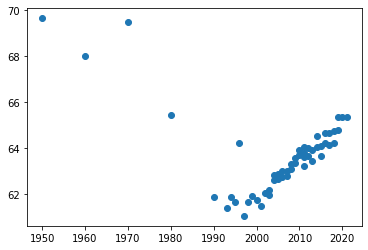

In [1371]:
plt.scatter(df['year'][df['race'] == 'White'], df['pct_married'][df['race'] == 'White'])

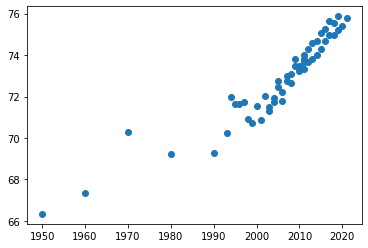

In [1372]:
plt.scatter(df['year'][df['race'] == 'Black'], 
            df['pct_married'][df['race'] == 'Black'])





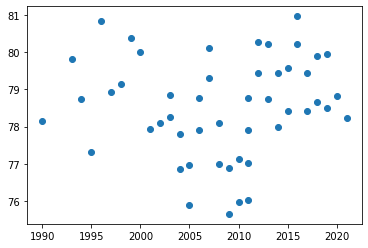

In [1373]:
plt.scatter(df['year'][df['race'] == 'Asian'], 
            df['pct_married'][df['race'] == 'Asian'])





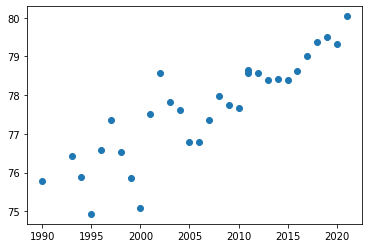

In [1375]:
plt.scatter(df['year'][df['race'] == 'Hispanic'], 
            df['pct_married'][df['race'] == 'Hispanic'])



